In [2]:
# 1. 数据下载和载入
'''
from shutil import copyfileobj
from six.moves import urllib
from sklearn.datasets.base import get_data_home
import os

def fetch_mnist(data_home=None):
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    data_home = get_data_home(data_home=data_home)
    data_home = os.path.join(data_home, 'mldata')
    if not os.path.exists(data_home):
        os.makedirs(data_home)
    mnist_save_path = os.path.join(data_home, "mnist-original.mat")
    if not os.path.exists(mnist_save_path):
        mnist_url = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_save_path, "wb") as matlab_file:
            copyfileobj(mnist_url, matlab_file)
            
fetch_mnist()
'''
from sklearn.datasets.base import get_data_home 
print (get_data_home())

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

mnist

C:\Users\xusy\scikit_learn_data


c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X, y = mnist["data"], mnist["target"]

print(X.shape)

print(y.shape)

(70000, 784)
(70000,)


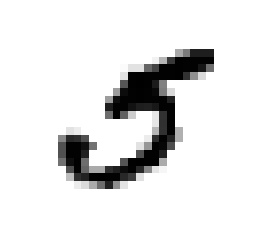

5.0


In [8]:
# 1.1 数据图片展示
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()
print(y[36000])


In [4]:
# 1.2 数据划分
from sklearn.model_selection import StratifiedShuffleSplit
mysplit = StratifiedShuffleSplit(n_splits=1, test_size=1.0/7, random_state=42)

for train_index, test_index in mysplit.split(X, y):
    train_set = X[train_index]
    train_label_set = y[train_index]
    test_set = X[test_index]
    test_label_set = y[test_index]


print(train_set.shape)
print(test_set.shape)

import pandas as pd
df_test = pd.DataFrame(test_label_set,columns=['label'])
df_train = pd.DataFrame(train_label_set,columns=['label'])

print("train:\n",df_train["label"].value_counts()/len(df_train))
print("test:\n",df_test["label"].value_counts()/len(df_test))


(60000, 784)
(10000, 784)
train:
 1.0    0.112533
7.0    0.104183
3.0    0.102017
2.0    0.099850
9.0    0.099400
0.0    0.098617
6.0    0.098233
8.0    0.097500
4.0    0.097483
5.0    0.090183
Name: label, dtype: float64
test:
 1.0    0.1125
7.0    0.1042
3.0    0.1020
2.0    0.0999
9.0    0.0994
0.0    0.0986
6.0    0.0982
8.0    0.0975
4.0    0.0975
5.0    0.0902
Name: label, dtype: float64


In [9]:

# 2. 训练分类器
y_train = train_label_set.copy()
y_train_5 = (train_label_set == 5)
y_test_5 = (test_label_set == 5)
X_train = train_set.copy()
X_test = test_set.copy()
# 2.1 训练单个分类器 数字5， 采用随机梯度下降分类器
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([ True], dtype=bool)

In [73]:
# 3. 交叉验证
# 3.1 实现交叉验证
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))
    
                           

c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.967451627419


c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9669


c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.964498224911


In [6]:
# 3.2 使用交叉验证
from sklearn.model_selection import cross_val_score

sgd_score = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(sgd_score) 

c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

[ 0.96745163  0.9669      0.96449822]


In [48]:
# 3.2.1 对于skewed dataset，偏度较大数据类别不均衡的特殊情况
import numpy as np
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        # N*1 的false 由于5只占了不到10%所以正确率很高
        return np.zeros((len(X), 1), dtype=bool) 
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train, y_train_5,cv = 3,scoring="accuracy")

array([ 0.90935,  0.91135,  0.90875])

In [13]:
# 3.3 采用混淆矩阵来评估分类
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_5, y_train_pred))

# 3.4 通过混淆矩阵可以计算精准率和召回率和F1分数
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision:\t",precision_score(y_train_5, y_train_pred))
print("recall:\t\t", recall_score(y_train_5,y_train_pred))
print("f1_score:\t",f1_score(y_train_5,y_train_pred))

c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

[[53741   848]
 [ 1175  4236]]
precision:	 0.83320220299
recall:		 0.782849750508
f1_score:	 0.807241543592


In [53]:
# 3.5 实现SGD阈值分类器
import numpy as np
from sklearn.linear_model import SGDClassifier
class SGD_thred_Classifier(SGDClassifier):
    def __init__(self, threshold = 0):
        self.threshold = threshold
        self.clf = SGDClassifier()
    def fit(self, X, y=None):
        self.clf.fit(X,y)
    def predict(self, X):
        return np.array((self.clf.decision_function(X)>self.threshold), dtype=bool)

sgd_tred_clf = SGD_thred_Classifier(threshold=20000)

sgd_tred_clf.fit(X_train,y_train_5)

sgd_tred_clf.predict([some_dight])

c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

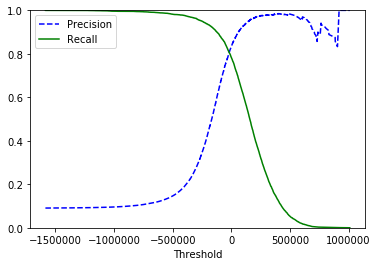

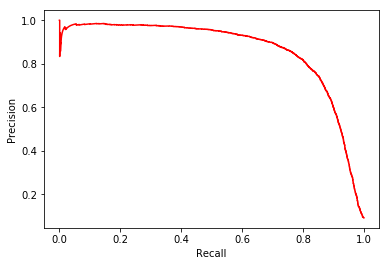

In [99]:
# 3.6 绘制PRT曲线图和PR曲线
y_scores = cross_val_predict(sgd_clf,X_train, y_train_5, cv=3,
                             method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds, recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

def plot_precision_vs_recall(precisions,recalls):
    plt.plot(recalls,precisions,"r")
    plt.xlabel("Recall")
    plt.ylabel("Precision")

plot_precision_vs_recall(precisions,recalls)
plt.show()

In [97]:
for ind in range(len(precisions)):
    if abs(precisions[ind]-recalls[ind])<1e-4:
        print(thresholds[ind])

import pandas as pd
df = pd.DataFrame(np.array([precisions[:-1],recalls[:-1],thresholds]).T,columns=["pre","rec","thre"])
np.array([precisions[:-1],recalls[:-1],thresholds]).T.shape
df.info()
df.describe()

-19010.1206192


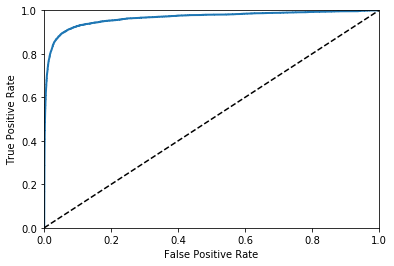

auc:		 0.965363759809


In [101]:
# 3.7 绘制ROC曲线和计算AUC曲线下面积
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr,linewidth = 2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate") # 预测正例错误/所有反例
    plt.ylabel("True Positive Rate") # 预测正例正确/所有正例
    
plot_roc_curve(fpr, tpr)
plt.show()
from sklearn.metrics import roc_auc_score
print("auc:\t\t",roc_auc_score(y_train_5,y_scores))

c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper 

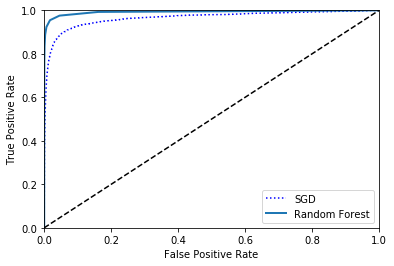

In [104]:
# 3.8 采用随机森林分类器与随机梯度下降分类器比较
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state =42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,
                                   method="predict_proba")
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

plt.plot(fpr,tpr,'b:',label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [105]:
roc_auc_score(y_train_5, y_scores_forest)

0.99263403902725944

In [108]:
# 4. 多分类
# 一对一多分类其需要N*(N-1)/2个二分类器，每个分类器只需要在对应的两个类别的子集上训练
# 一对其他分类器需要N个二分类器，按照得分最高来判断
# 对于大多数二分类算法OVA比较好
# 对于SVM它对训练集尺寸缩放的表现不好，OVO比较好，它在小的训练集合上训练多个分类器比在大集合上训练少量分类器更快

# 4.1 sklearn使用二分类算法对多分类任务时自动调用OVA（SVM使用OVO）
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

some_digit_scores = sgd_clf.decision_function([some_dight])
print(some_digit_scores)

c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([ 5.])

In [114]:
# 4.2 显式调用ovo或是ova
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
print(ovo_clf.predict([some_digit]))
print(len(ovo_clf.estimators_))

[ 5.]
45


In [113]:
# 忽略掉warning
import warnings
warnings.filterwarnings("ignore")

In [115]:
# 随机森林等可以多分类的模型不需要OVA或OVO
forest_clf.fit(X_train, y_train)
print(forest_clf.predict([some_digit]))
print(forest_clf.predict_proba([some_digit]))

array([ 5.])

In [117]:
# 4.3 评估多分类器
sgd_score = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
print(sgd_score)

[ 0.85522172  0.83920804  0.87862573]


In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
sgd_scaled_score = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
print(sgd_scaled_score)

[ 0.90846373  0.91135443  0.90918184]


In [119]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
print(conf_mx)

[[5731    3   23   12    8   43   48    9   36    4]
 [   1 6496   42   32    6   41   11    8   99   16]
 [  53   36 5334  108   96   27   95   58  168   16]
 [  46   37  128 5365    1  225   36   51  125  107]
 [  19   26   41    6 5374    9   55   29   81  209]
 [  79   42   32  181   78 4594  113   32  164   96]
 [  33   28   46    2   47  101 5589    6   41    1]
 [  28   22   67   32   58    9    7 5746   13  269]
 [  53  163   66  155   15  149   68   27 5017  137]
 [  51   24   27   85  165   34    3  170   71 5334]]


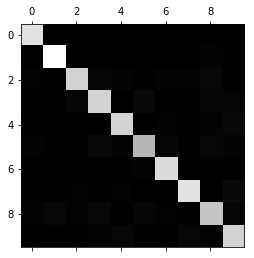

In [121]:
# 未归一化的混淆矩阵
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

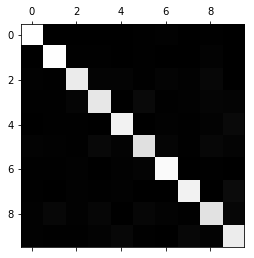

In [122]:
# 归一化后的混淆矩阵
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

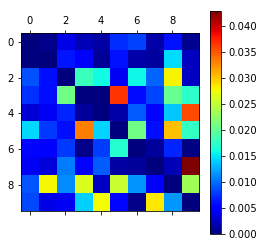

In [126]:
# 只显示错误
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.jet)
plt.colorbar()
plt.show()

In [145]:
def plot_digits(digits, images_per_row):
    row=images_per_row
    col=row 
    for i in range(row*row):
        digits_img=digits[i].reshape(28,28)
        plt.subplot(row,col,i+1)
        plt.imshow(digits_img, cmap=matplotlib.cm.binary,
          interpolation="nearest")
        plt.axis("off")
    plt.show()

In [28]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [131]:
print(len(X_aa))

5365


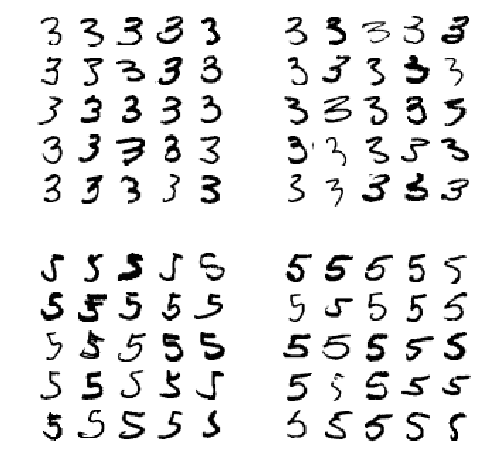

In [150]:
# 单独分析
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [15]:
# 4.4 多标签分类器，如人脸识别多标签，或是数字识别一个范围
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train[:1000],y_multilabel[:1000])
print(knn_clf.predict([some_digit]))

[[False  True]]


In [17]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train[:1000], y_train[:1000], cv=3)
print(f1_score(y_train[:1000], y_train_knn_pred, average="macro"))

0.859344329935


In [24]:
# 4.5 多输出多类分类器
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

NameError: name 'save_fig' is not defined

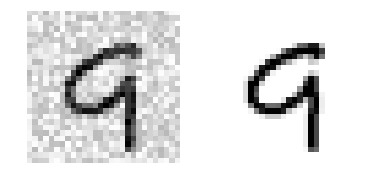

In [31]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])

plt.show()

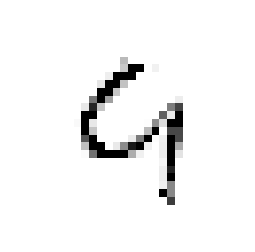

In [32]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)